In [ ]:
import pandas as pd
import numpy as np
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df=pd.read_csv(r'E:\data science\Project_work\webmd.csv',skipinitialspace=True)

In [ ]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [ ]:
df.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [ ]:
df.shape

(362806, 12)

In [ ]:
#Missing values in each feature
df.isnull().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41868
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [ ]:
# drop 'Other' condition from original dataset as other condition does not have any meaning

df=df.drop(labels=df[df.Condition=='Other'].index,axis=0)

In [ ]:
#Missing value imputation for categorical vlaue
#Get the object columns

obj_columns1=df[['Age']]
obj_columns2 = df[['Reviews']]
obj_columns3 = df[['Sex']]
obj_columns4 = df[['Sides']]
obj_columns5 = df[['Condition']]

In [ ]:
# mode value for each object column

age_mode = df.Age.mode()
Reviews_mode = df.Reviews.mode()
Sex_mode = df.Sex.mode()
Sides_mode = df.Sides.mode()
Condition_mode = df.Condition.mode()
print (" Mode for Age column\n",age_mode)
print (" \nMode for Reviews column\n",Reviews_mode)
print (" \nMode for Sex column\n",Sex_mode)
print (" \nMode for Sides column\n",Sides_mode)
print (" \nMode for Condition column\n",Condition_mode)

 Mode for Age column
 0    45-54
dtype: object
 
Mode for Reviews column
 0    this treatment is awsome.  I love drugs.
dtype: object
 
Mode for Sex column
 0    Female
dtype: object
 
Mode for Sides column
 0    Nausea ,  vomiting ,  constipation ,  lighthea...
dtype: object
 
Mode for Condition column
 0    Pain
dtype: object


In [ ]:
#Missing value imputation for categorical vlaue
obj_columns1 = obj_columns1.fillna(obj_columns1.mode().iloc[0])
obj_columns2 = obj_columns2.fillna(obj_columns2.mode().iloc[0])
obj_columns3 = obj_columns3.fillna(obj_columns3.mode().iloc[0])
obj_columns4 = obj_columns4.fillna(obj_columns4.mode().iloc[0])
obj_columns5 = obj_columns5.fillna(obj_columns5.mode().iloc[0])

In [ ]:
#Join the data set with imputed object dataset
data_cleaned=pd.concat([df,obj_columns1,obj_columns2,obj_columns3,obj_columns4,obj_columns5],axis=1)

In [ ]:
# drop the column having null values
data_cleaned = data_cleaned.dropna(how = 'any', axis = 1)

In [ ]:
# As input feature should be in interger data type, so change the data type of every feature 
# Total unique values in age and sex column


print("unique values in age column:\n",data_cleaned['Age'].unique())
print("\n unique values in Sex column:\n",data_cleaned['Sex'].unique())
print("\n unique values in Drug column:\n",data_cleaned['Drug'].unique())
print("\n unique values in Condition column:\n",data_cleaned['Condition'].unique())
print("\n unique values in Sidescolumn:\n",data_cleaned['Sides'].unique())


unique values in age column:
 ['75 or over' '25-34' '45-54' '55-64' '19-24' '35-44' '13-18' '65-74'
 '7-12' '0-2' '3-6']

 unique values in Sex column:
 ['Male' 'Female']

 unique values in Drug column:
 ['25dph-7.5peh' 'wymzya fe' '12 hour nasal relief spray, non-aerosol' ...
 'chest congestion relief dm' 'chantix' 'chateal']

 unique values in Condition column:
 ['Stuffy Nose' 'Cold Symptoms' 'Birth Control' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance']

 unique values in Sidescolumn:
 ['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.'
 'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.'
 'Temporary burning, stinging, dryness in the nose,  runny nose , and  sneezing  may occur.'
 ...
 'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , o

In [ ]:
# To covert data type of sex and age column into integer used mapping here
data_cleaned['Age'] = data_cleaned['Age'].map({'0-2': 1, 
                                               '3-6': 2,
                                               '7-12': 3,
                                               '13-18': 4,
                                               '19-24': 5,
                                               '25-34': 6,
                                               '35-44': 7,
                                               '45-54': 8,
                                               '55-64': 9,
                                               '65-74': 10,
                                               '75 or over': 11}).astype(int)

data_cleaned['Sex'] = data_cleaned['Sex'].map({'Male': 0, 'Female': 1}).astype(int)


In [ ]:
# To covert data type of 'Drug', 'Condition','Sides' column into integer used Label encoding here

In [ ]:
# # Label Encoding Drugname and Conditions
# from sklearn.preprocessing import LabelEncoder
# label_encoder_feat = {}
# for feature in ['Drug', 'Condition','Sides']:
#     label_encoder_feat[feature] = LabelEncoder()
#     data_cleaned[feature] = label_encoder_feat[feature].fit_transform(data_cleaned[feature])

In [ ]:
# Converting the date in to date time format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [ ]:
# Remove the Drugs whose counts is less than 5 i.e. removed[1,2,3,4,5] 
from collections import Counter
counts = data_cleaned['Drug'].value_counts()

data_cleaned = data_cleaned[~data_cleaned['Drug'].isin(counts[counts < 6].index)]

In [ ]:
print('Original Data set shape',data_cleaned.shape),
print('\nClean Data set shape',data_cleaned.shape),

Original Data set shape (307072, 12)

Clean Data set shape (307072, 12)


(None,)

In [ ]:
df.Drug.value_counts()

lisinopril solution                            4158
lisinopril                                     4158
cymbalta                                       4134
lexapro                                        3890
hydrocodone-acetaminophen                      3818
                                               ... 
cayston vial for nebulizer                        1
ferretts ips                                      1
proctosol-hc cream with perineal applicator       1
added strength pain reliever                      1
allergy relief tablet,disintegrating              1
Name: Drug, Length: 5641, dtype: int64

In [ ]:
satisfiction_count=data_cleaned['Satisfaction'].value_counts()
effectiveness_count=data_cleaned['Effectiveness'].value_counts()
ease_of_use_count=data_cleaned['EaseofUse'].value_counts()
li = [0,1,2,3,4,5,6]
Rating = pd.Series(li)
value_count=pd.concat([Rating ,satisfiction_count,effectiveness_count,ease_of_use_count],axis=1)
value_count.rename(columns = {0:'Rating','Satisfaction':'satisfiction_count','Effectiveness':'effectiveness_count','EaseofUse':'ease_of_use_count'}, inplace = True)

In [ ]:
value_count

,Rating,satisfiction_count,effectiveness_count,ease_of_use_count
0,0,NaN,NaN,NaN
1,1,83835.0,47821.0,28906.0
2,2,30372.0,26247.0,15166.0
3,3,44578.0,51730.0,34841.0
4,4,54465.0,70652.0,64047.0
5,5,93820.0,110620.0,164110.0
6,6,2.0,2.0,2.0


In [ ]:
# from value coount of drug, there is only 2 drugs whose having rating 6
# remove those drug
ls=[data_cleaned[data_cleaned['Satisfaction']==10],data_cleaned[data_cleaned['Satisfaction']==6],data_cleaned[data_cleaned['Effectiveness']==10],data_cleaned[data_cleaned['Effectiveness']==6],data_cleaned[data_cleaned['EaseofUse']==10],data_cleaned[data_cleaned['EaseofUse']==6]]
for i in ls:
   data_cleaned = data_cleaned.drop(labels=i.index,axis=0) 

In [ ]:
print('Original Data set shape',df.shape),
print('\nClean Data set shape',data_cleaned.shape),

Original Data set shape (313041, 12)

Clean Data set shape (307070, 12)


(None,)

In [ ]:
import os
os.getcwd()

'C:\\Users\\Rehan'

In [ ]:
data_cleaned.to_csv('new_data')

In [ ]:
data_cleaned.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Age,Sex
count,307070.000000,307070.000000,307070.000000,307070.000000,307070.000000,307070.000000,307070.000000
mean,35320.755075,4.039792,3.553629,3.143495,6.966428,7.819373,0.728375
std,51544.980762,1.300421,1.439781,1.603088,9.441350,1.693127,0.444798
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,4729.000000,3.000000,3.000000,1.000000,1.000000,7.000000,0.000000
50%,8862.000000,5.000000,4.000000,3.000000,4.000000,8.000000,1.000000
75%,63163.000000,5.000000,5.000000,5.000000,9.000000,9.000000,1.000000
max,178485.000000,5.000000,5.000000,5.000000,222.000000,11.000000,1.000000


# Exploratory Data Analysis

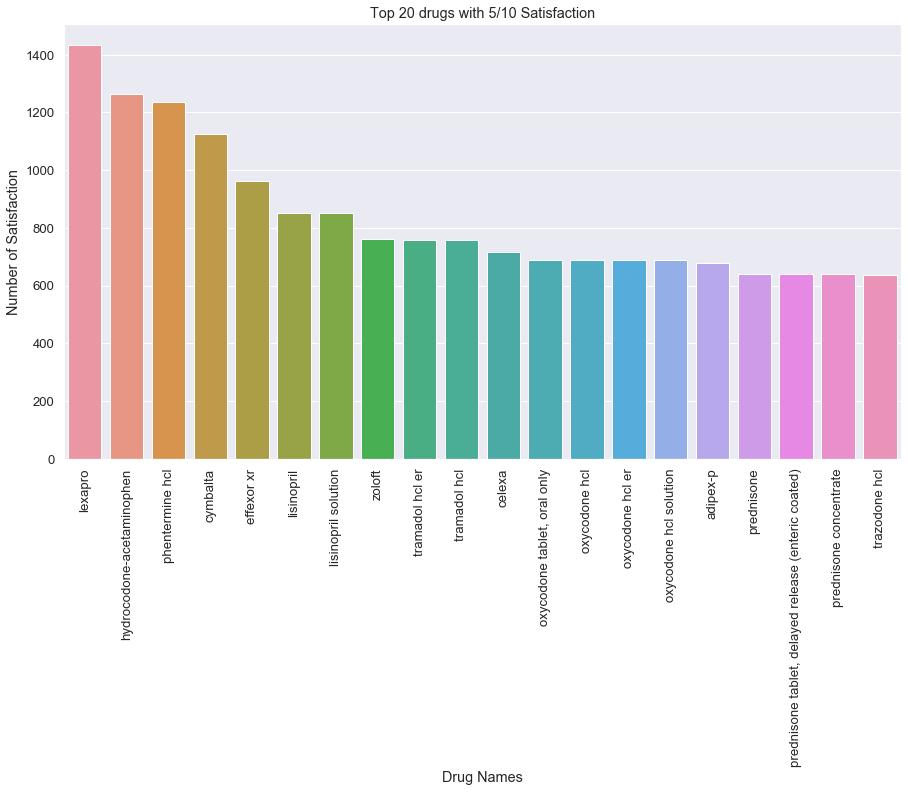

In [ ]:
# This barplot shows the top 20 drugs with the 5/10 Satisfaction ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Satisfaction = dict(data_cleaned.loc[data_cleaned.Satisfaction == 5, "Drug"].value_counts())
drugname = list(Satisfaction.keys())
drug_Satisfaction = list(Satisfaction.values())

sns_Satisfaction = sns.barplot(x = drugname[0:20], y = drug_Satisfaction[0:20])
sns_Satisfaction.set_title('Top 20 drugs with 5/10 Satisfaction')
sns_Satisfaction.set_ylabel("Number of Satisfaction")
sns_Satisfaction.set_xlabel("Drug Names")
plt.setp(sns_Satisfaction.get_xticklabels(), rotation=90);

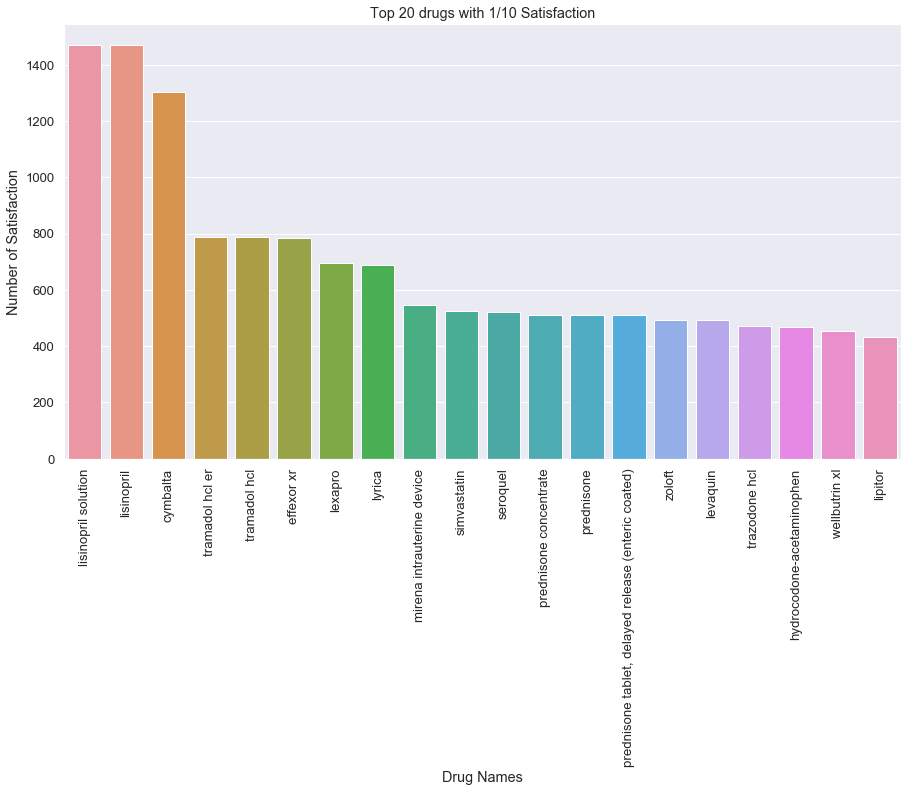

In [ ]:
# This barplot shows the top 20 drugs with the 1/10 Satisfaction_ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Satisfaction = dict(data_cleaned.loc[data_cleaned.Satisfaction == 1, "Drug"].value_counts())
drugname = list(Satisfaction.keys())
drug_Satisfaction = list(Satisfaction.values())

sns_Satisfaction = sns.barplot(x = drugname[0:20], y = drug_Satisfaction[0:20])

sns_Satisfaction.set_title('Top 20 drugs with 1/10 Satisfaction')
sns_Satisfaction.set_ylabel("Number of Satisfaction")
sns_Satisfaction.set_xlabel("Drug Names")
plt.setp(sns_Satisfaction.get_xticklabels(), rotation=90);

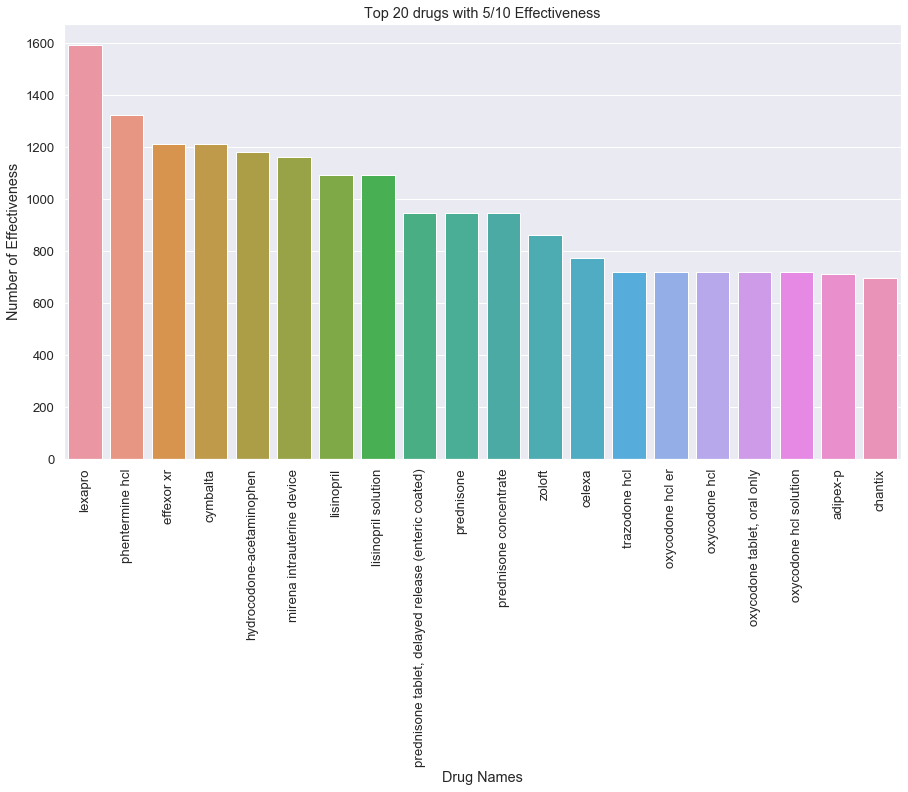

In [ ]:
# This barplot shows the top 20 drugs with the 5/10 Effectiveness
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Effectiveness = dict(data_cleaned.loc[data_cleaned.Effectiveness == 5, "Drug"].value_counts())
drugname = list(Effectiveness.keys())
drug_Effectiveness = list(Effectiveness.values())

sns_Effectiveness = sns.barplot(x = drugname[0:20], y = drug_Effectiveness[0:20])

sns_Effectiveness.set_title('Top 20 drugs with 5/10 Effectiveness')
sns_Effectiveness.set_ylabel("Number of Effectiveness")
sns_Effectiveness.set_xlabel("Drug Names")
plt.setp(sns_Effectiveness.get_xticklabels(), rotation=90);

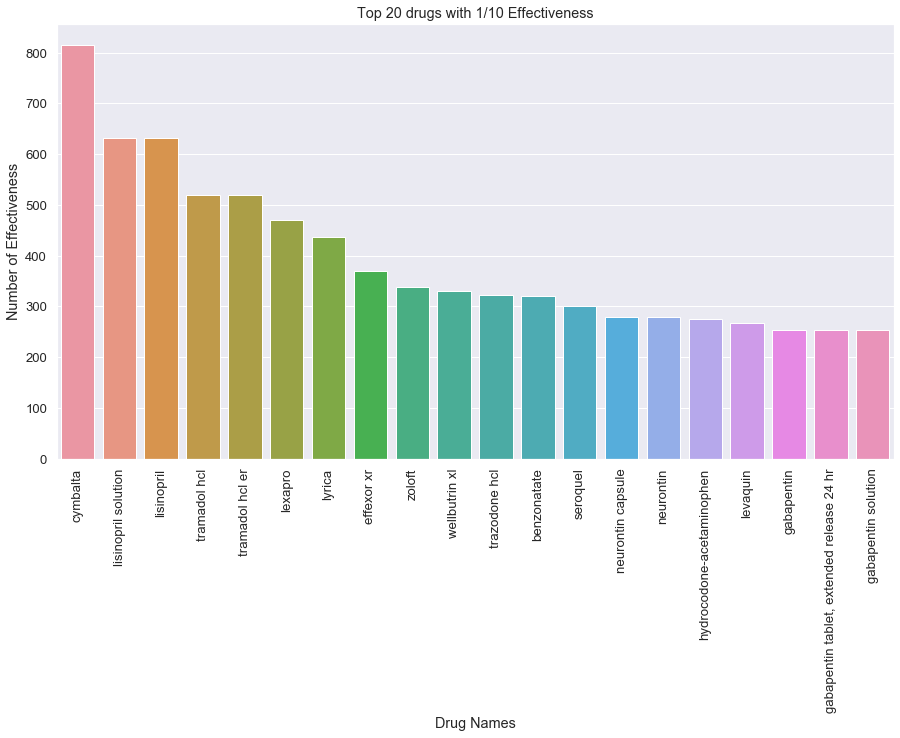

In [ ]:
# This barplot shows the top 20 drugs with the 1/10 Effectiveness
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

Effectiveness = dict(data_cleaned.loc[data_cleaned.Effectiveness == 1, "Drug"].value_counts())
drugname = list(Effectiveness.keys())
drug_Effectiveness = list(Effectiveness.values())

sns_Effectiveness = sns.barplot(x = drugname[0:20], y = drug_Effectiveness[0:20])

sns_Effectiveness.set_title('Top 20 drugs with 1/10 Effectiveness')
sns_Effectiveness.set_ylabel("Number of Effectiveness")
sns_Effectiveness.set_xlabel("Drug Names")
plt.setp(sns_Effectiveness.get_xticklabels(), rotation=90);

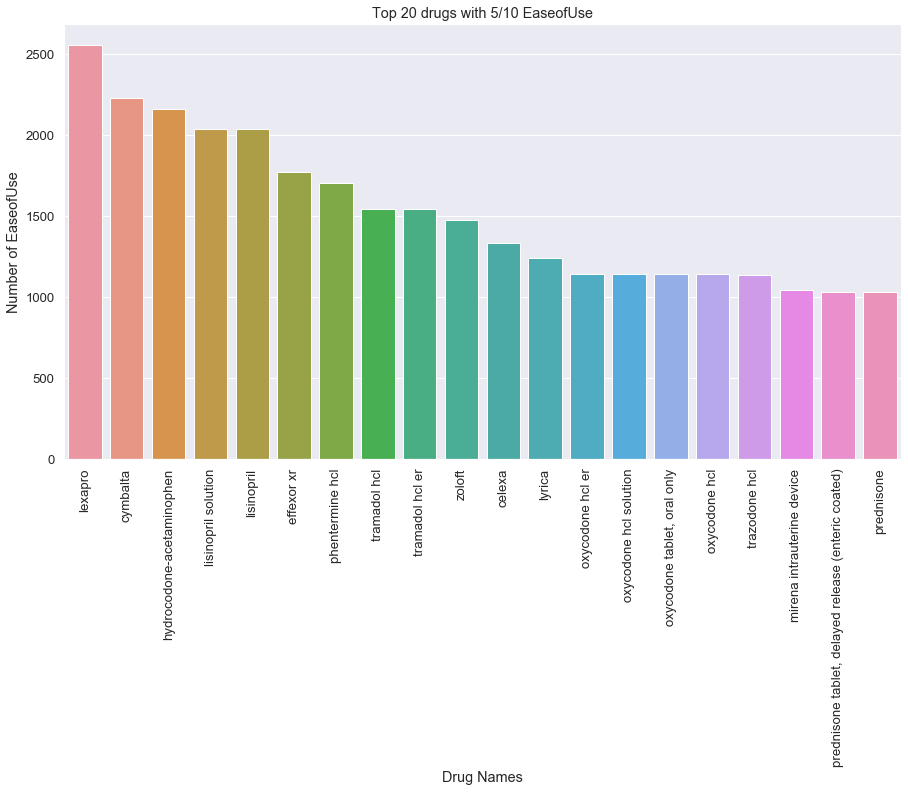

In [ ]:
# This barplot shows the top 20 drugs with the 5/10 EaseofUse
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

EaseofUse = dict(data_cleaned.loc[data_cleaned.EaseofUse == 5, "Drug"].value_counts())
drugname = list(EaseofUse.keys())
EaseofUse = list(EaseofUse.values())

sns_EaseofUse = sns.barplot(x = drugname[0:20], y = EaseofUse[0:20])

sns_EaseofUse.set_title('Top 20 drugs with 5/10 EaseofUse')
sns_EaseofUse.set_ylabel("Number of EaseofUse")
sns_EaseofUse.set_xlabel("Drug Names")
plt.setp(sns_EaseofUse.get_xticklabels(), rotation=90);

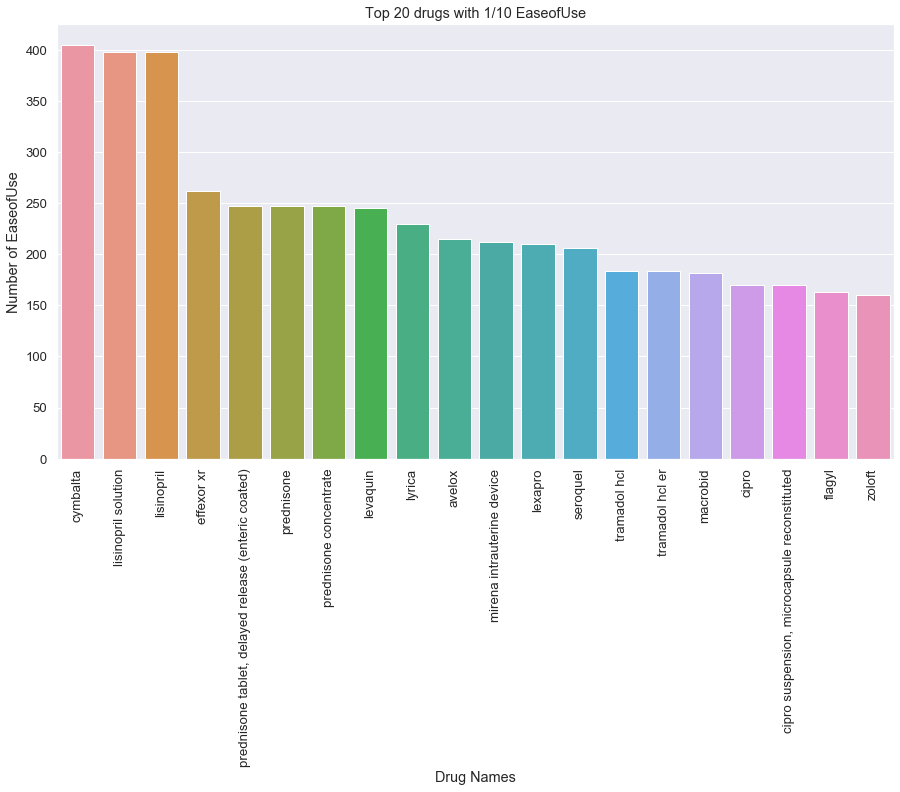

In [ ]:
# This barplot shows the top 20 drugs with the 1/10 EaseofUse
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

EaseofUse = dict(data_cleaned.loc[data_cleaned.EaseofUse == 1, "Drug"].value_counts())
drugname = list(EaseofUse.keys())
EaseofUse = list(EaseofUse.values())

sns_EaseofUse = sns.barplot(x = drugname[0:20], y = EaseofUse[0:20])

sns_EaseofUse.set_title('Top 20 drugs with 1/10 EaseofUse')
sns_EaseofUse.set_ylabel("Number of EaseofUse")
sns_EaseofUse.set_xlabel("Drug Names")
plt.setp(sns_EaseofUse.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Satisfaction')

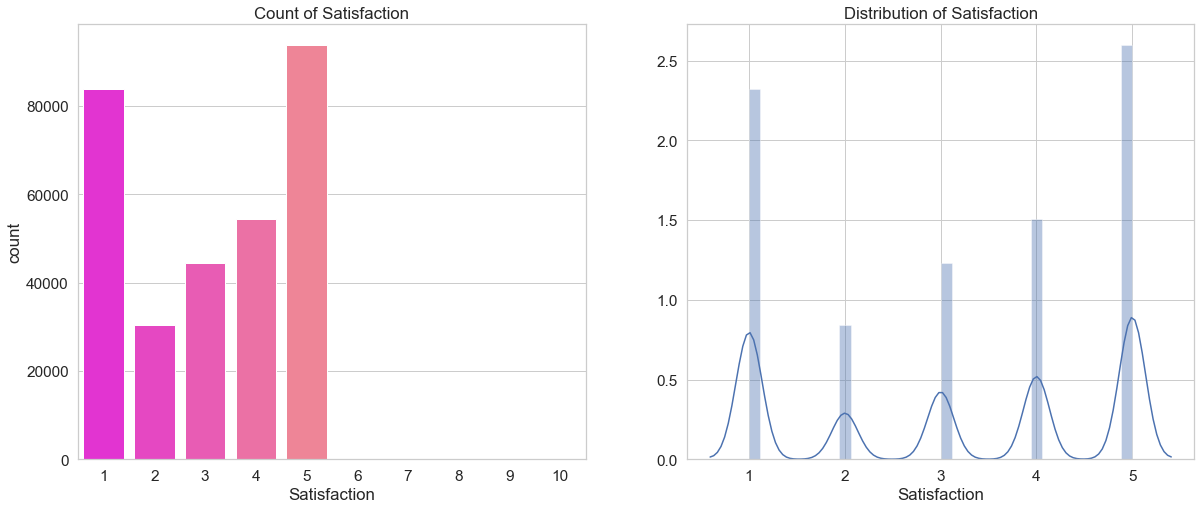

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data_cleaned['Satisfaction'], palette = 'spring', order = list(range(1, 11)), ax = ax[0])
sns_2 = sns.distplot(data_cleaned['Satisfaction'], ax = ax[1])
sns_1.set_title('Count of Satisfaction')
sns_1.set_xlabel("Satisfaction")

sns_2.set_title('Distribution of Satisfaction')
sns_2.set_xlabel("Satisfaction")

Text(0.5, 0, 'Effectiveness')

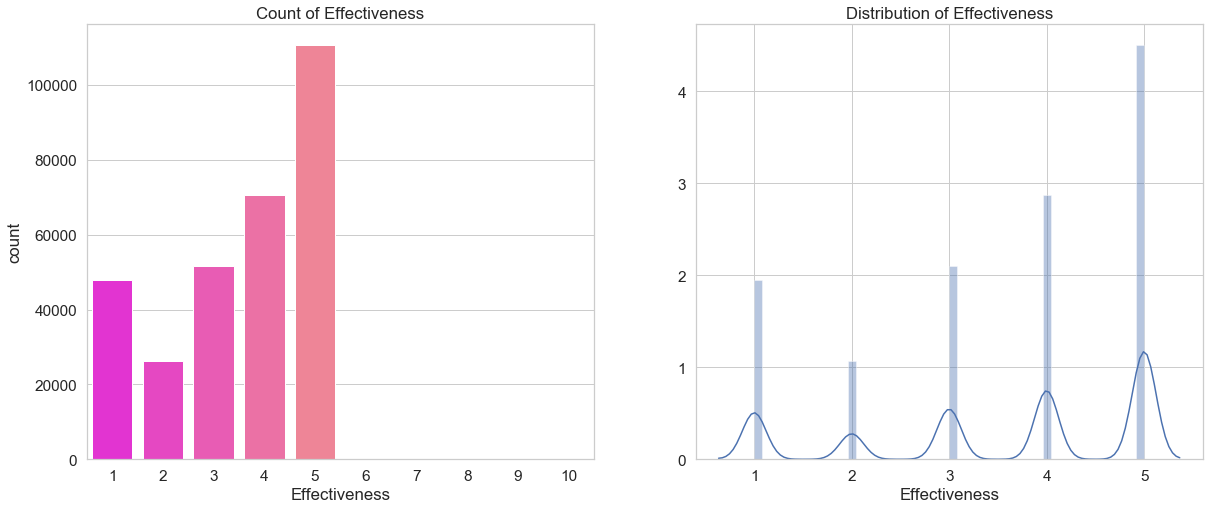

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data_cleaned['Effectiveness'], palette = 'spring', order = list(range(1, 11)), ax = ax[0])
sns_2 = sns.distplot(data_cleaned['Effectiveness'], ax = ax[1])
sns_1.set_title('Count of Effectiveness')
sns_1.set_xlabel("Effectiveness")

sns_2.set_title('Distribution of Effectiveness')
sns_2.set_xlabel("Effectiveness")

Text(0.5, 0, 'EaseofUse')

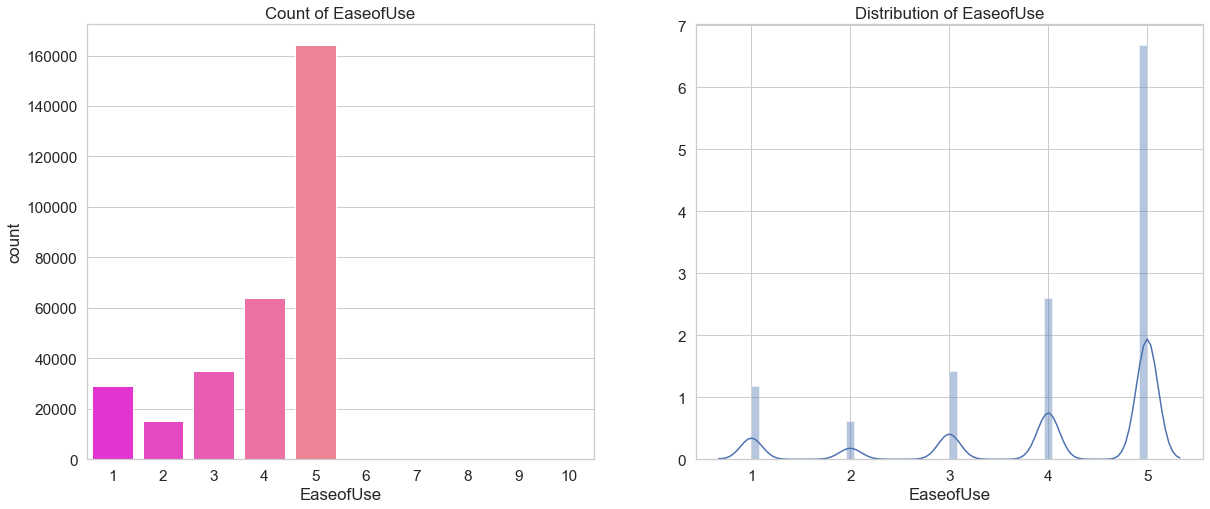

In [ ]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data_cleaned['EaseofUse'], palette = 'spring', order = list(range(1, 11)), ax = ax[0])
sns_2 = sns.distplot(data_cleaned['EaseofUse'], ax = ax[1])
sns_1.set_title('Count of EaseofUse')
sns_1.set_xlabel("EaseofUse")

sns_2.set_title('Distribution of EaseofUse')
sns_2.set_xlabel("EaseofUse")

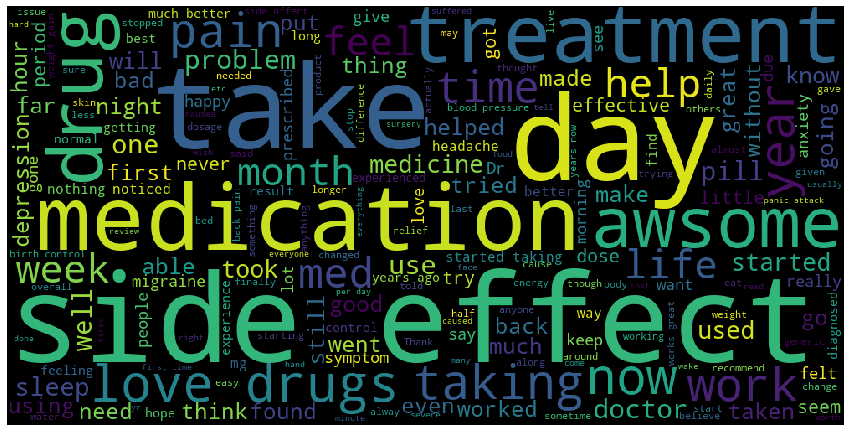

In [ ]:
# Word cloud of the reviews with Satisfaction_rating equal to 5
df_rate_ten = data_cleaned.loc[data_cleaned.Satisfaction == 5, 'Reviews']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

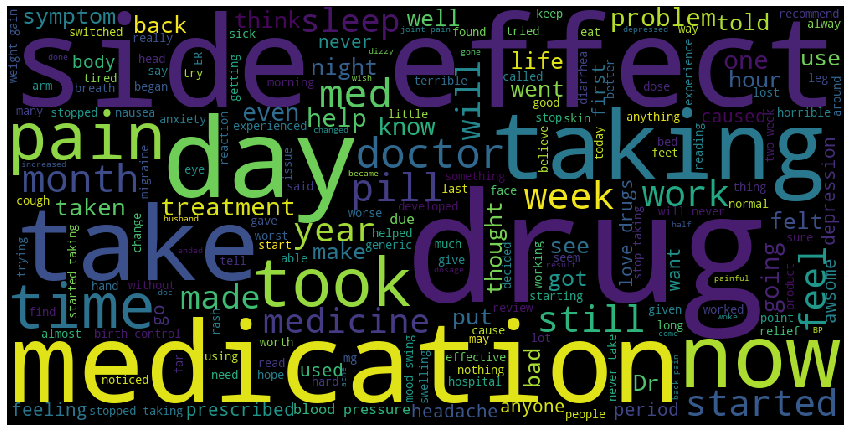

In [ ]:
# Word cloud of the reviews with Satisfaction_rating equal to 1
df_rate_ten = data_cleaned.loc[data_cleaned.Satisfaction == 1, 'Reviews']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

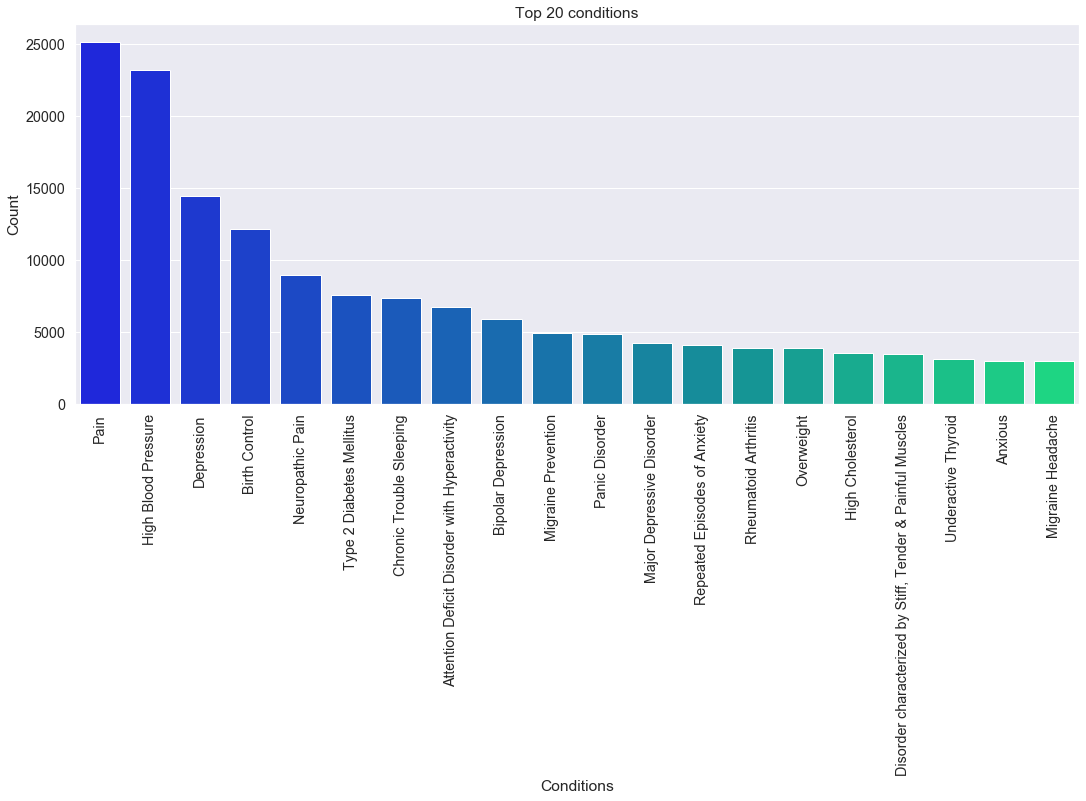

In [ ]:
# This barplot show the top 20 conditions the people are suffering.
cond = dict(data_cleaned['Condition'].value_counts())
top_condition = list(cond.keys())[0:20]
values = list(cond.values())[0:20]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 20 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");
plt.setp(sns_.get_xticklabels(), rotation=90);

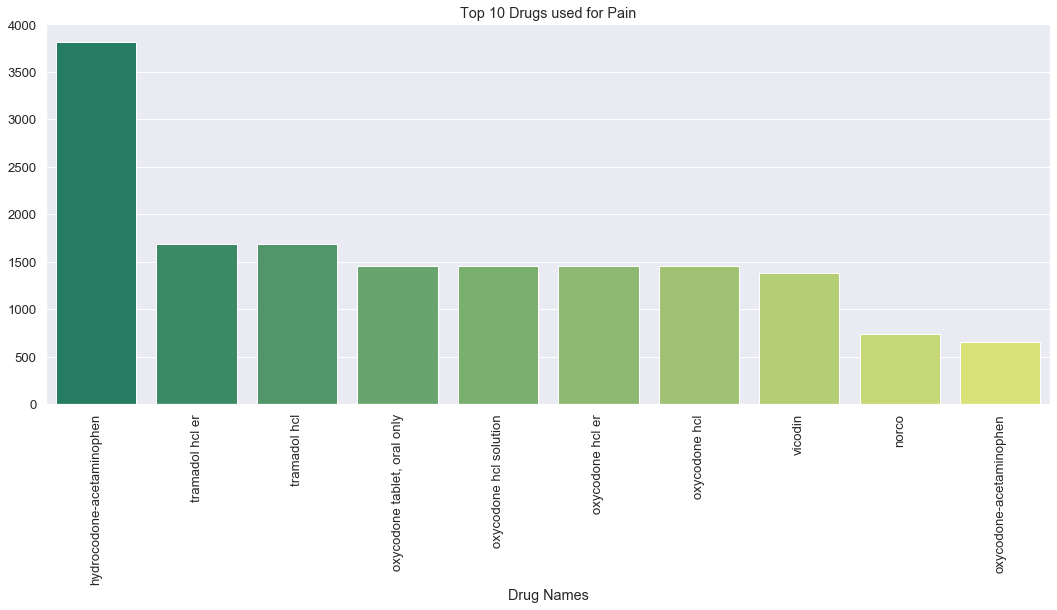

In [ ]:
# Top 10 drugs which are used for the pain condition.
df2 = data_cleaned[data_cleaned['Condition'] == 'Pain']['Drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df2.index, y = df2.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Pain")
plt.setp(sns_.get_xticklabels(), rotation = 90);

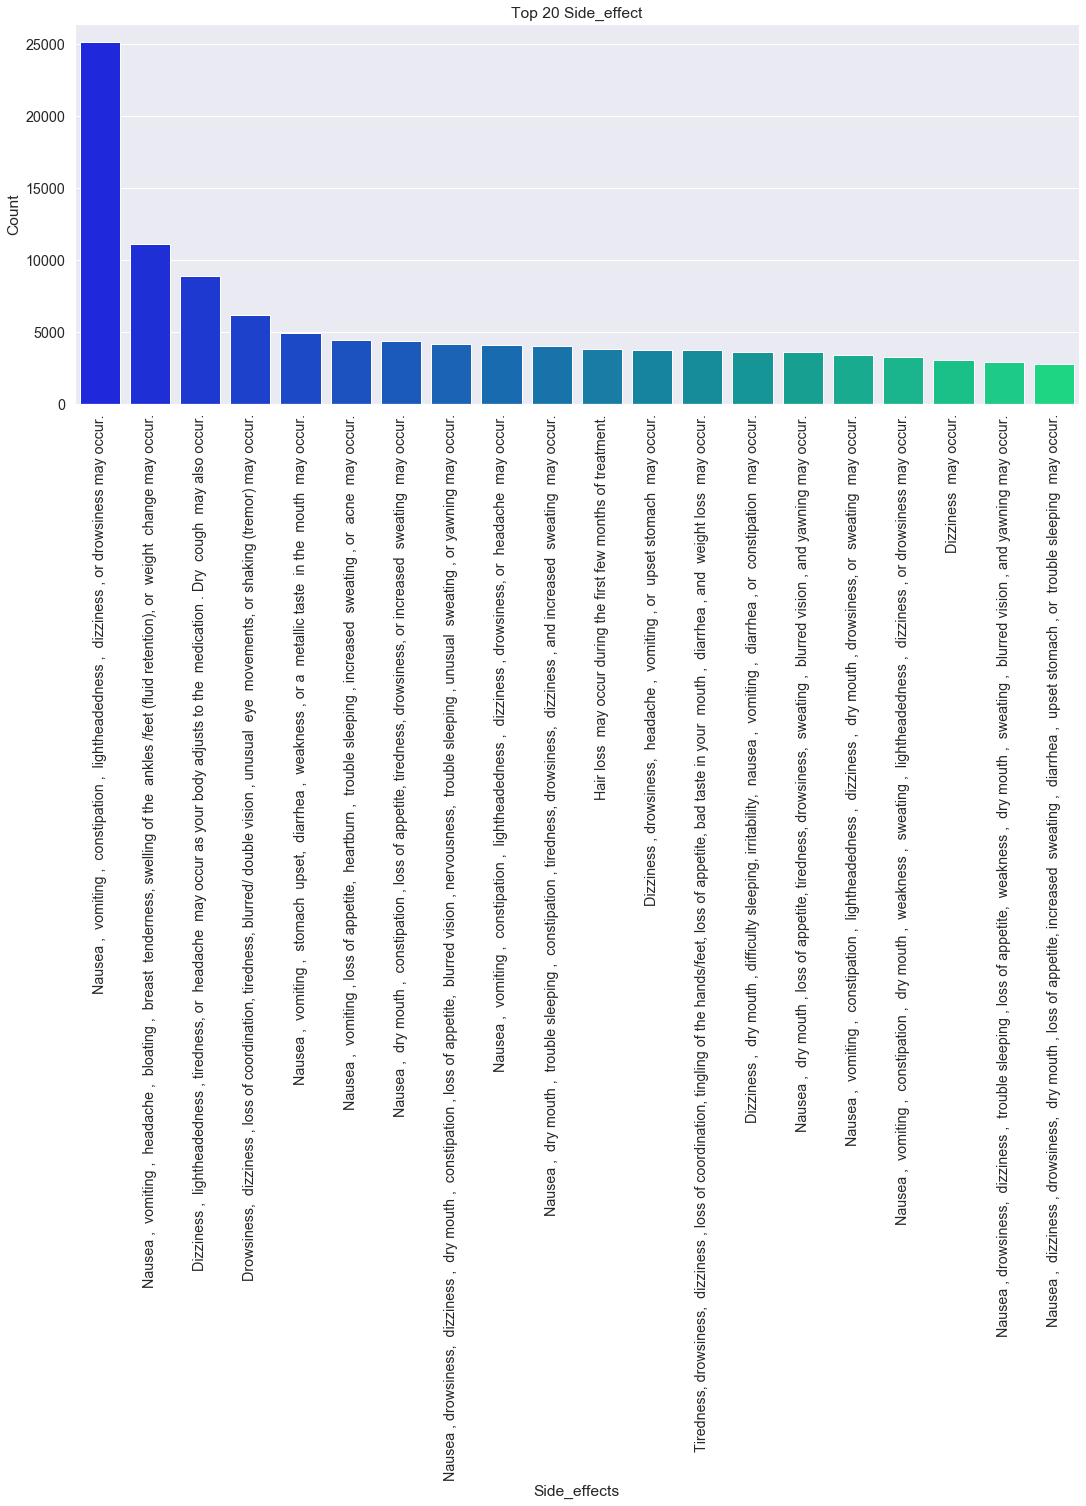

In [ ]:
# This barplot show the top 20 side_effects
side = dict(data_cleaned['Sides'].value_counts())
top_Sides = list(side.keys())[0:20]
values = list(side.values())[0:20]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_Sides, y = values, palette = 'winter')
sns_.set_title("Top 20 Side_effect")
sns_.set_xlabel("Side_effects")
sns_.set_ylabel("Count");
plt.setp(sns_.get_xticklabels(), rotation=90);

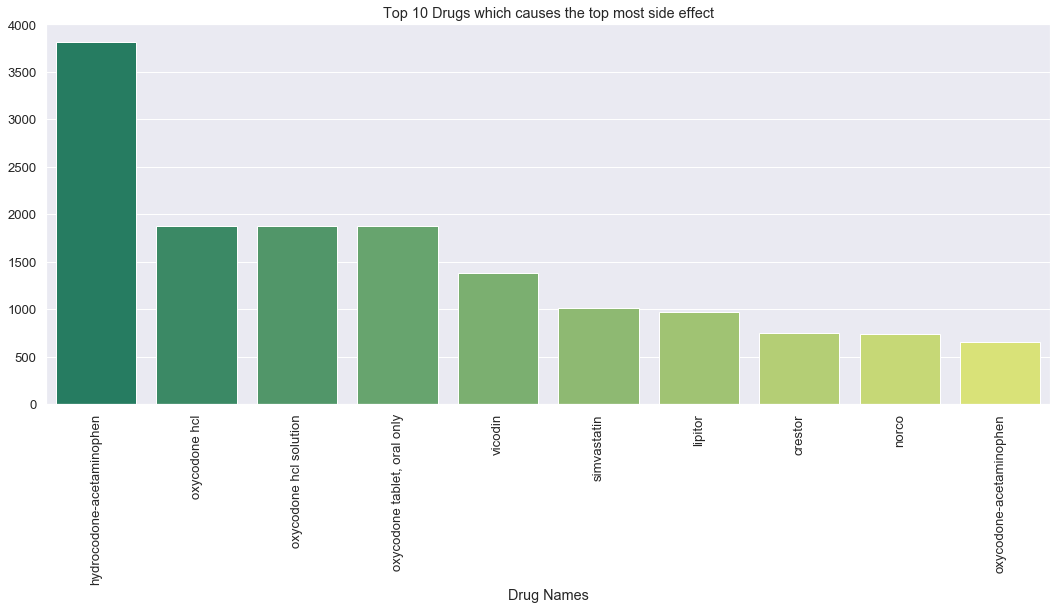

In [ ]:
# Top 10 drugs which are responsible for top most side effect  
df2 = data_cleaned[data_cleaned['Sides'] == 'Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.']['Drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df2.index, y = df2.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs which causes the top most side effect")
plt.setp(sns_.get_xticklabels(), rotation = 90);

# Text_Mining


In [ ]:
text = data_cleaned.Reviews

In [ ]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [ ]:
clean_text = text.apply(clean)

In [ ]:
#stop words
stop_word = pd.read_csv(r'stop.txt', header=None)
st_word = [i for i in stop_word[0]]

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
my_stop_words = stop.copy()
#add some more stop words
for i in st_word:
    my_stop_words.append(i)

In [ ]:
len(st_word), len(stop), len(my_stop_words)

In [ ]:
#setiment analysis
from textblob import TextBlob

In [ ]:
df_text = pd.DataFrame({'Review':clean_text})

In [ ]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_text['review_stop'] = df_text['Review'].apply(lambda x: ' '.join(word for word in x.split() if word not in my_stop_words))

In [ ]:
#Lemmetisation
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lt = WordNetLemmatizer() 
df_text['review_clean']  = df_text['review_stop'] .apply(lambda x: " ".join([lt.lemmatize(word) for word in x.split()]))

In [ ]:
# its gives the polarity and subjectivity values
df_text[['polarity', 'subjectivity']] = df_text['review_clean'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
for index, row in df_text['review_clean'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= - 0.05:
        df_text.loc[index, 'sentiment'] = -1   #'negative'
    elif comp >= 0.05:
        df_text.loc[index, 'sentiment'] =  1   #'positive'
    else:
        df_text.loc[index, 'sentiment'] =  0    #'neutral'
    df_text.loc[index, 'neg'] = neg
    df_text.loc[index, 'neu'] = neu
    df_text.loc[index, 'pos'] = pos
    df_text.loc[index, 'compound'] = comp

In [ ]:
# Word cloud of the Clean reviews with +ve sentiments
df_rate_ten = df_text.loc[df_text.sentiment == 1., 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('positive sentiment.jpg')

In [ ]:
# Word cloud of the Clean reviews with neutral sentiments
df_rate_ten = df_text.loc[df_text.sentiment == 0, 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('neutral sentiment.jpg')

In [ ]:
# Word cloud of the Clean reviews with -ve sentiments
df_rate_ten = df_text.loc[df_text.sentiment == -1., 'review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('negative sentiment.jpg')

In [ ]:
# Word cloud of the reviews with Satisfaction_rating equal to 1
df_rate_ten = df_text.loc[df_text.sentiment == 1., 'Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');
plt.savefig('positive_sentiment_Rev.jpg')

In [ ]:
# Word cloud of the unclean reviews 
df_rate_ten = df_text['Review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

plt.savefig('Review.jpg')

In [ ]:
# Word cloud of the Clean reviews
df_rate_ten = df_text['review_clean']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

plt.savefig('clean_review.jpg')

In [ ]:
#N-gram
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n2_words(corpus,ngram_range, n=None):
    vec1 = CountVectorizer(ngram_range=ngram_range,  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top2_words = get_top_n2_words(df_text["review_clean"],ngram_range=(2,2), n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

In [ ]:
get_top_n2_words(df_text["review_clean"],ngram_range=(3,3), n=200) #trigram

In [ ]:
get_top_n2_words(df_text["review_clean"],ngram_range=(1,1), n=200) #bigram

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [ ]:
nltk.download('punkt')
# Top 20 unigrams according to the Satisfaction_rating
df_ = df_text[['sentiment', 'review_clean']]
df_['Reviews'] = df_text['review_clean'].str.replace("&#039;", "")
df_['Reviews'] = df_['Reviews'].str.replace(r'[^\w\d\s]',' ')

df_review_3 = " ".join(df_.loc[df_.sentiment == 1., 'review_clean'])
df_review_5 = " ".join(df_.loc[df_.sentiment == -1., 'review_clean'])

token_review_3 = word_tokenize(df_review_3)
token_review_5 = word_tokenize(df_review_5)

unigrams_3 = ngrams(token_review_3, 1)
unigrams_5 = ngrams(token_review_5, 1)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 unigrams of +ve sentiment")
sns_5.set_title("Top 20 unigrams of -ve sentiment")
sns_3.set_ylabel("Unigrams")
sns_5.set_ylabel("Unigrams")

plt.savefig('Unigram_20.jpg')

In [ ]:
# Top 20 bigarams according to the Satisfaction_rating
unigrams_3 = ngrams(token_review_3, 2)
unigrams_5 = ngrams(token_review_5, 2)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 bigrams of +ve sentiment")
sns_5.set_title("Top 20 bigrams of -ve sentiment")
sns_3.set_ylabel("bigrams")
sns_5.set_ylabel("bigrams")

plt.savefig('Biggram_20.jpg')

In [ ]:
# Top 20 Trigrams according to the Satisfaction_rating
unigrams_3 = ngrams(token_review_3, 3)
unigrams_5 = ngrams(token_review_5, 3)

frequency_3 = Counter(unigrams_3)
frequency_5 = Counter(unigrams_5)

df_3 = pd.DataFrame(frequency_3.most_common(20))
df_5 = pd.DataFrame(frequency_5.most_common(20))

# Barplot that shows the top 20 Trigrams
plt.rcParams['figure.figsize'] = [16,12]
fig, ax = plt.subplots(2,1)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_3 = sns.barplot(x = df_3[1], y = df_3[0], color = 'Springgreen', ax = ax[0])
sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'Springgreen', ax = ax[1])

# Setting axes labels
sns_3.set_title("Top 20 Trigrams of +ve sentiments")
sns_5.set_title("Top 20 Trigrams of -ve sentiments")
sns_3.set_ylabel("Trigrams")
sns_5.set_ylabel("Trigrams");

plt.savefig('Trigram_20.jpg')

#Feature Engineering


Take Reviews as inpout features


In [ ]:
text_data = df_text.tail(70000)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=1500,analyzer='word')
x = tv.fit_transform(text_data['review_clean'].values.astype('U'))


tf_vect_df = pd.DataFrame(x.toarray(), columns= tv.get_feature_names())
tf_vect_df

Take Sentiment as output featurs


In [ ]:
y=text_data.sentiment

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(tf_vect_df,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape, Y_test.shape

In [ ]:
Y_train.value_counts()

# Modeling


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import accuracy_score

In [ ]:
# Training Model - I
clf1 = LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model1 = clf1.fit(X_train, Y_train)

# Predictions
predictions1 = model1.predict(X_test)
print ("The Accuracy of the train_data is : ", model1.score(X_train, Y_train))
print ("The Accuracy of the model is : ", accuracy_score(Y_test, predictions1))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions1,Y_test))

In [ ]:
# Training Model - 2
clf2 = XGBClassifier(n_estimator = 1000,
                   learning_rate=0.10,
                   num_leaves=30)
model2 = clf2.fit(X_train, Y_train)

# Predictions
predictions2 = model2.predict(X_test)
print ("The Accuracy of the train_data is : ", model2.score(X_train, Y_train))
print ("The Accuracy of the model2 is : ", accuracy_score(Y_test, predictions2))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions2,Y_test))

In [ ]:
# Training Model - 4
from sklearn import linear_model
clf4 = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model4 = clf4.fit(X_train, Y_train)

# Predictions
predictions4 = model4.predict(X_test)
print ("The Accuracy of the train_data is : ", model4.score(X_train, Y_train))
print ("The Accuracy of the model4 is : ", accuracy_score(Y_test, predictions4))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions4,Y_test))

In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,predictions4)
print (confusion_matrix)

In [ ]:
# Training Model - 5
clf5 = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=42)
model5 = clf5.fit(X_train, Y_train)

# Predictions
predictions5 = model5.predict(X_test)
print ("The Accuracy of the train_data is : ", model5.score(X_train, Y_train))
print ("The Accuracy of the model5 is : ", accuracy_score(Y_test, predictions5))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions5,Y_test))

# from Accuracy Report and Confusion Matrix Logistic Rrgression model is best fitted model

In [ ]:
# EXport the model
import joblib 

In [ ]:
joblib.dump(model4,'/content/drive/MyDrive/trial_csv/model.pkl')

# Prediction


In [ ]:
tv=joblib.load('/content/drive/MyDrive/trial_csv/model.pkl')

In [ ]:
tv

In [ ]:
X = tf_vect_df

In [ ]:
X.iloc[0:2]

In [ ]:
model4.predict(X.iloc[0:2])

In [ ]:
y.iloc[0:2]